In [1]:
import pandas as pd
hospital_info = pd.read_csv("/Users/basamg/textmining_team_project/hospital_info.csv")

In [2]:
hospital_info

,hospital_id,hospital_name,telephone,opening_hours,weekday_lunch,weekend_lunch,medical_subject,address
0,1046,보문한의원,02-926-8844,"monday 09:30:00-19:00:00, tuesday 09:30:00-19:...",NaN,00:00:00-00:00:00,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 침구과...",서울 성북구 정릉동 407-12 태영빌딩2층
1,10566,서울바른소아치과의원,02-743-2842,"monday 10:00:00-18:00:00, tuesday 10:00:00-18:...",12:00:00-13:40:00,12:00:00-13:00:00,"치과, 내과, 구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존...",서울 성북구 동소문동2가 229 2층
2,10605,서울온치과의원,02-2135-2875,"monday 09:30:00-18:30:00, tuesday 09:30:00-21:...",13:00:00-14:00:00,00:00:00-00:00:00,"치과, 구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존과, 구...",서울 성북구 장위동 218-32 소산빌딩
3,11240,오제홍재활의학과의원,02-923-1696,"monday 09:00:00-19:00:00, tuesday 09:00:00-19:...",13:00:00-14:00:00,00:00:00-00:00:00,"재활의학과, 정형외과, 신경외과, 마취통증의학과",서울 성북구 동소문동5가 67-1 강윤빌딩 3층
4,11501,이보영소아과의원,02-766-9334,"monday 09:30:00-18:00:00, tuesday 09:30:00-18:...",13:00:00-14:00:00,00:00:00-00:00:00,소아청소년과,서울 성북구 동소문동1가 32-1 청운빌딩
...,...,...,...,...,...,...,...,...
1315,9568,규림한의원,02-938-8975,"monday 11:00:00-21:00:00, tuesday 11:00:00-21:...",NaN,00:00:00-00:00:00,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 침구과...",서울 노원구 상계동 728-1 중원빌딩
1316,9640,김앤박내과의원,02-930-7601,"monday 09:00:00-18:00:00, tuesday 09:00:00-18:...",13:00:00-14:00:00,00:00:00-00:00:00,내과,서울 노원구 상계동 728-2
1317,9684,김태영정신건강의학과의원,02-937-0118,"monday 09:30:00-18:00:00, tuesday 09:30:00-20:...",13:00:00-14:00:00,13:00:00-14:00:00,정신건강의학과,서울 노원구 상계동 728-7
1318,9744,노원마디본의원,02-930-8275,"monday 09:00:00-20:00:00, tuesday 09:00:00-21:...",NaN,00:00:00-00:00:00,정형외과,서울 노원구 상계동 728-2 한일빌딩 다이소 4층


In [5]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('jhgan/ko-sroberta-sts')  # 한국어에 적합한 모델
#'jhgan/ko-sroberta-multitask' - k=19 에서 실루엣 스코어 0.21
# sts 는 텍스트의 의미적 유사성을 이용
# nli 는 두 문장의 관계


In [9]:
text=[]
for i in range(len(hospital_info)):
    info=f"""운영시간:{hospital_info.loc[i,'opening_hours']}.점심휴식시간:{hospital_info.loc[i,'weekday_lunch']}.진료과:{hospital_info.loc[i,'medical_subject']}.병원 위치(주소):{hospital_info.loc[i,'address']}."""
    text.append(info)

In [19]:
query = "성형외과 13:00 장위동"
query_embedding = model.encode(query,convert_to_tensor= True)

In [21]:
hospital_info.loc[1257]

hospital_id                           88003
hospital_name                      노원 아이디의원
telephone                          18550050
opening_hours                           NaN
weekday_lunch                           NaN
weekend_lunch                           NaN
medical_subject              내과, 피부과, 가정의학과
address            서울 노원구 상계동 709 MG노원빌딩 7층
Name: 1257, dtype: object

In [9]:
import torch
import torch.nn.functional as F

In [11]:
#text_embedding = model.encode(text, convert_to_tensor= True)

weights = {
    "hospital_name" : 0.2,
    "opening_hours" : 0.2,
    "medical_subject" : 0.4,
    "address" : 0.2
}
hospital_embeddings = []
for i in range( len(hospital_info)) :
    embeddings = []
    for key, weight in weights.items():
        text = str(hospital_info.loc[i,key])
        emb = model.encode([text], convert_to_tensor=True)
        #emb = F.normalize(emb, p=2, dim=1) # 벡터의 크기를 normalize 해서 벡터 길이가 긴 임베딩의 영향을줄인다.
        embeddings.append(emb*weight)
    combined = torch.stack(embeddings).sum(dim=0)
    hospital_embeddings.append(combined)

In [12]:
hospital_embeddings = torch.stack(hospital_embeddings)
hospital_embeddings.shape

torch.Size([1320, 1, 768])

In [13]:
torch.save(hospital_embeddings,"hospital_embeddings(sroberta-sts-normal,address0.2).pt")

In [25]:
hospital_embeddings.shape
sq_hospital_embeddings = hospital_embeddings.squeeze(1)  # (N, 768)

In [27]:
from sentence_transformers.util import cos_sim
cos_score = cos_sim(query_embedding, sq_hospital_embeddings)

In [29]:
score, index = cos_score.topk(5)

In [30]:
idx = index.squeeze().tolist()
print(hospital_info.loc[idx,'hospital_name'])

641     김순진성형외과의원
1025         JK의원
995      서울성형외과의원
760      미유여성외과의원
440         예지미의원
Name: hospital_name, dtype: object


In [227]:
for i in index.squeeze(0): # 크기가 1인 차원 제거 - (1,5) → (,5)
    print(hospital_info.loc[i.item(),'hospital_name'])

휴플러스치과의원
이고른치과의원
푸른치과의원
한솔치과의원
태릉씨티치과의원


In [275]:
cos_score.topk(5)[1].shape

torch.Size([1, 5])

In [33]:
for i in range(5):
    print(f"{cos_score.topk(5)[0].squeeze()[i].item():.2f}",end=' ')
    idx = cos_score.topk(5)[1].squeeze()[i].item()
    print(hospital_info.loc[idx])

0.68 hospital_id                                                    18931
hospital_name                                              김순진성형외과의원
telephone                                                02-937-0255
opening_hours      monday 10:00:00-19:00:00, tuesday 10:00:00-19:...
weekday_lunch                                      13:00:00-14:00:00
weekend_lunch                                      13:00:00-14:00:00
medical_subject                                             외과, 성형외과
address                                            서울 노원구 상계동 711-13
Name: 641, dtype: object
0.67 hospital_id                                                    59633
hospital_name                                                   JK의원
telephone                                                02-951-1603
opening_hours      monday 10:30:00-19:00:00, tuesday 10:30:00-19:...
weekday_lunch                                      13:00:00-14:00:00
weekend_lunch                                      13:00:00-14:00:00

In [221]:
hospital_info

,hospital_id,hospital_name,telephone,opening_hours,weekday_lunch,weekend_lunch,medical_subject,address
0,1046,보문한의원,02-926-8844,"monday 09:30:00-19:00:00, tuesday 09:30:00-19:...",NaN,00:00:00-00:00:00,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 침구과...",서울 성북구 정릉동 407-12 태영빌딩2층
1,10566,서울바른소아치과의원,02-743-2842,"monday 10:00:00-18:00:00, tuesday 10:00:00-18:...",12:00:00-13:40:00,12:00:00-13:00:00,"치과, 내과, 구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존...",서울 성북구 동소문동2가 229 2층
2,10605,서울온치과의원,02-2135-2875,"monday 09:30:00-18:30:00, tuesday 09:30:00-21:...",13:00:00-14:00:00,00:00:00-00:00:00,"치과, 구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존과, 구...",서울 성북구 장위동 218-32 소산빌딩
3,11240,오제홍재활의학과의원,02-923-1696,"monday 09:00:00-19:00:00, tuesday 09:00:00-19:...",13:00:00-14:00:00,00:00:00-00:00:00,"재활의학과, 정형외과, 신경외과, 마취통증의학과",서울 성북구 동소문동5가 67-1 강윤빌딩 3층
4,11501,이보영소아과의원,02-766-9334,"monday 09:30:00-18:00:00, tuesday 09:30:00-18:...",13:00:00-14:00:00,00:00:00-00:00:00,소아청소년과,서울 성북구 동소문동1가 32-1 청운빌딩
...,...,...,...,...,...,...,...,...
1315,9568,규림한의원,02-938-8975,"monday 11:00:00-21:00:00, tuesday 11:00:00-21:...",NaN,00:00:00-00:00:00,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 침구과...",서울 노원구 상계동 728-1 중원빌딩
1316,9640,김앤박내과의원,02-930-7601,"monday 09:00:00-18:00:00, tuesday 09:00:00-18:...",13:00:00-14:00:00,00:00:00-00:00:00,내과,서울 노원구 상계동 728-2
1317,9684,김태영정신건강의학과의원,02-937-0118,"monday 09:30:00-18:00:00, tuesday 09:30:00-20:...",13:00:00-14:00:00,13:00:00-14:00:00,정신건강의학과,서울 노원구 상계동 728-7
1318,9744,노원마디본의원,02-930-8275,"monday 09:00:00-20:00:00, tuesday 09:00:00-21:...",NaN,00:00:00-00:00:00,정형외과,서울 노원구 상계동 728-2 한일빌딩 다이소 4층


In [27]:
load_embed = torch.load("hospital_embeddings(sroberta-sts-normal,address0.2).pt")

In [33]:
load_embed.shape

torch.Size([1320, 1, 768])

/opt/anaconda3/envs/TM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/TM/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score: 0.7106


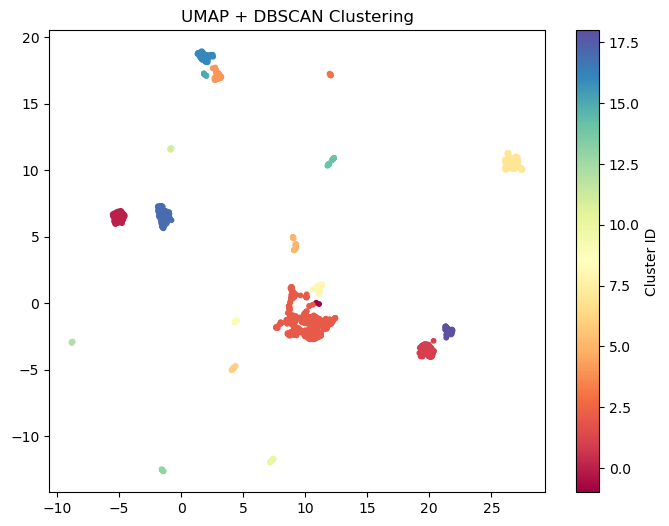

In [39]:
import numpy as np
import umap
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 예시 임베딩 (1320, 1, 768)
# 실제로는 여기에 본인의 임베딩 결과 넣기

# Step 1. reshape (1320, 1, 768) → (1320, 768)
X = load_embed.squeeze(1)
X = X.cpu()
# Step 2. UMAP 차원 축소
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)  # shape: (1320, 2)

# Step 3. DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps는 필요시 조정
labels = dbscan.fit_predict(X_umap)      # shape: (1320,)

# Step 4. 실루엣 점수 계산 (노이즈 제외)
mask = labels != -1
if len(set(labels[mask])) > 1:
    score = silhouette_score(X_umap[mask], labels[mask])
    print(f"Silhouette Score: {score:.4f}")
else:
    print("군집이 1개 이하이므로 실루엣 스코어 계산 불가")

# Step 5. 시각화
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='Spectral', s=10)
plt.title("UMAP + DBSCAN Clustering")
plt.colorbar(scatter, label='Cluster ID')
plt.show()
